Work by - Kartikey Singh

## Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# import data
df = pd.read_csv('MFG10YearTerminationData.csv')

In [4]:
# Checking the columns of the dataset
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [5]:
# Shifting STATUS column to last position for convenience
col_list = list(df)
col_list[-1], col_list[-2] = col_list[-2], col_list[-1]
df = df.reindex(columns=col_list)
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,BUSINESS_UNIT,STATUS
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,HEADOFFICE,ACTIVE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,HEADOFFICE,ACTIVE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,HEADOFFICE,ACTIVE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,HEADOFFICE,ACTIVE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,HEADOFFICE,ACTIVE


### Column names information - by Lyndon Sundmark (dataset creator)
* Employeeid is employee number an identifier
* Recorddate is when the information for employee was taken
* Birthdate – day the person was born
* Original hire date- when person joined the organization
* Termination date- when the person left the organization
* Age- how old the person was for that year
* Length of service- status year- hire year
* City- where fictitious person located
* Department- what department worked in
* Job-title – what work they did
* Store number- what store they worked in
* Gender- what sex they were
* Termination reason – why they left
* Termination type – voluntary or involuntary
* Status year- 10 years of data – which year it was
* Status – active or terminated
* Business-unit – head office or not

In [6]:
# check the shape of data
df.shape

(49653, 18)

In [7]:
# information on data types
df.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
BUSINESS_UNIT          object
STATUS                 object
dtype: object

#### Understanding the output variable

In [8]:
df['STATUS'].unique()

array(['ACTIVE', 'TERMINATED'], dtype=object)

In [9]:
df['STATUS'].value_counts()

ACTIVE        48168
TERMINATED     1485
Name: STATUS, dtype: int64

####  Checking for missing values

In [10]:
df.isnull().any()

EmployeeID             False
recorddate_key         False
birthdate_key          False
orighiredate_key       False
terminationdate_key    False
age                    False
length_of_service      False
city_name              False
department_name        False
job_title              False
store_name             False
gender_short           False
gender_full            False
termreason_desc        False
termtype_desc          False
STATUS_YEAR            False
BUSINESS_UNIT          False
STATUS                 False
dtype: bool

We don't seem to have any missing values in our dataset

#### Removing redundant features from dataset

* Features like EmployeeID, city_name have no relevance
* record date and birth date provide the age, which is also a separate feature so we can drop record date and birth date
* length of service can be obtained from orighire date and  record date, which is again a separate feature so we can drop orighire date
* gender short and gender full both provide the same data so we can drop gender full
* department name and job title provide almost same kind of information and job title provides more descriptive details so we can drop department name
* some feature like termination date, termination reason and termination type give away the information our model will predict so these columns need to be removed

In [11]:
df = df.drop(columns = ['EmployeeID', 'birthdate_key', 'recorddate_key', 'orighiredate_key', 'terminationdate_key', 'termreason_desc', 'termtype_desc', 'department_name', 'gender_full'])
df.head()

,age,length_of_service,city_name,job_title,store_name,gender_short,STATUS_YEAR,BUSINESS_UNIT,STATUS
0,52,17,Vancouver,CEO,35,M,2006,HEADOFFICE,ACTIVE
1,53,18,Vancouver,CEO,35,M,2007,HEADOFFICE,ACTIVE
2,54,19,Vancouver,CEO,35,M,2008,HEADOFFICE,ACTIVE
3,55,20,Vancouver,CEO,35,M,2009,HEADOFFICE,ACTIVE
4,56,21,Vancouver,CEO,35,M,2010,HEADOFFICE,ACTIVE


#### Reformating strings into integral data

In [12]:
df['job_title'].value_counts()

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Meats Manager                       285
Bakery Manager                      285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Accounts Receiveable Clerk           30
Labor Relations Analyst              30
Trainer                              26
Accounts Payable Clerk               25
Investment Analyst                   20
Auditor                              20
Compensation Analyst                 20
Systems Analyst                      20
Corporate Lawyer                     17


For data analysis, we would need to categorize the job titles in a broader category which would span across multiple job titles. I am not able to understand the data in depth so I needed to look for some references on how to deal with this kind of situation. Hence, I'll be using reference codes for job_title and city_name features

In [13]:
'''
Job_title is the most tedious column, as it has many distinct entries, we will generalize like jobs into categories, and
then turn them into numerical values
'''

board = ['VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance',
         'Director, Accounts Receivable', 'Director, Accounting',
         'Director, Employee Records', 'Director, Accounts Payable',
         'Director, HR Technology', 'Director, Investments',
         'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

executive = ['Exec Assistant, Finance', 'Exec Assistant, Legal Counsel',
             'CHief Information Officer', 'CEO', 'Exec Assistant, Human Resources',
             'Exec Assistant, VP Stores']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']


employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

def changeTitle(row):
    if row in board:
        return 'board'
    elif row in executive:
        return 'executive'
    elif row in manager:
        return 'manager'
    else:
        return 'employee'
    
df['job_title'] = df['job_title'].apply(changeTitle)

df['job_title'] = df['job_title'].map({'board': 3, 'executive': 2, 'manager': 1, 'employee': 0})

df.head()

,age,length_of_service,city_name,job_title,store_name,gender_short,STATUS_YEAR,BUSINESS_UNIT,STATUS
0,52,17,Vancouver,2,35,M,2006,HEADOFFICE,ACTIVE
1,53,18,Vancouver,2,35,M,2007,HEADOFFICE,ACTIVE
2,54,19,Vancouver,2,35,M,2008,HEADOFFICE,ACTIVE
3,55,20,Vancouver,2,35,M,2009,HEADOFFICE,ACTIVE
4,56,21,Vancouver,2,35,M,2010,HEADOFFICE,ACTIVE


In [14]:
df['city_name'].value_counts()

Vancouver           11211
Victoria             4885
Nanaimo              3876
New Westminster      3211
Kelowna              2513
Burnaby              2067
Kamloops             2061
Prince George        2048
Cranbrook            1785
Surrey               1560
Richmond             1401
Terrace              1228
Chilliwack           1167
Trail                 925
Langley               901
Vernon                898
Squamish              806
Quesnel               703
Abbotsford            681
North Vancouver       648
Fort St John          621
Williams Lake         617
West Vancouver        613
Port Coquitlam        545
Aldergrove            520
Fort Nelson           322
Nelson                317
New Westminister      254
Grand Forks           236
White Rock            231
Haney                 182
Princeton             136
Dawson Creek          129
Bella Bella           126
Ocean Falls            65
Pitt Meadows           57
Cortes Island          43
Valemount              37
Dease Lake  

In [15]:
# or city_name feature, we can classify the data based on the popuation of the city where the person is located.
# >= 100,000 is City
# 10,000 to 99,999 is Rural
# < 10,000 is Remote
# Guidance from Australian Institute of Health and Welfare
# http://www.aihw.gov.au/rural-health-rrma-classification/

In [16]:
city_pop_2011 = {'Vancouver':2313328,
                 'Victoria':344615,
                 'Nanaimo':146574,
                 'New Westminster':65976,
                 'Kelowna':179839,
                 'Burnaby':223218,
                 'Kamloops':85678,
                 'Prince George':71974,
                 'Cranbrook':19319,
                 'Surrey':468251,
                 'Richmond':190473,
                 'Terrace':11486,
                 'Chilliwack':77936,
                 'Trail':7681,
                 'Langley':25081,
                 'Vernon':38180,
                 'Squamish':17479,
                 'Quesnel':10007,
                 'Abbotsford':133497,
                 'North Vancouver':48196,
                 'Fort St John':18609,
                 'Williams Lake':10832,
                 'West Vancouver':42694,
                 'Port Coquitlam':55985,
                 'Aldergrove':12083,
                 'Fort Nelson':3561,
                 'Nelson':10230,
                 'New Westminister':65976,
                 'Grand Forks':3985,
                 'White Rock':19339,
                 'Haney':76052,
                 'Princeton':2724,
                 'Dawson Creek':11583,
                 'Bella Bella':1095,
                 'Ocean Falls':129,
                 'Pitt Meadows':17736,
                 'Cortes Island':1007,
                 'Valemount':1020,
                 'Dease Lake':58,
                 'Blue River':215}

In [17]:
#Make a copy of city names
df['Pop'] = df['city_name']

# Map from city name to population
df['Pop'] = df.Pop.map(city_pop_2011)

# Make a new column for population category
df['Pop_category'] = df.Pop

city_ix = (df['Pop'] >= 100000)
rural_ix = ((df['Pop'] < 100000) & (df['Pop'] >= 10000))
remote_ix = (df['Pop'] < 10000)
df.loc[city_ix, 'Pop_category'] = 'City'
df.loc[rural_ix, 'Pop_category'] = 'Rural'
df.loc[remote_ix, 'Pop_category'] = 'Remote'

df['Pop_category'] = df['Pop_category'].map({'City' : 0, 'Rural' : 1, 'Remote' : 2})

#### Checking the correlation between independent variables

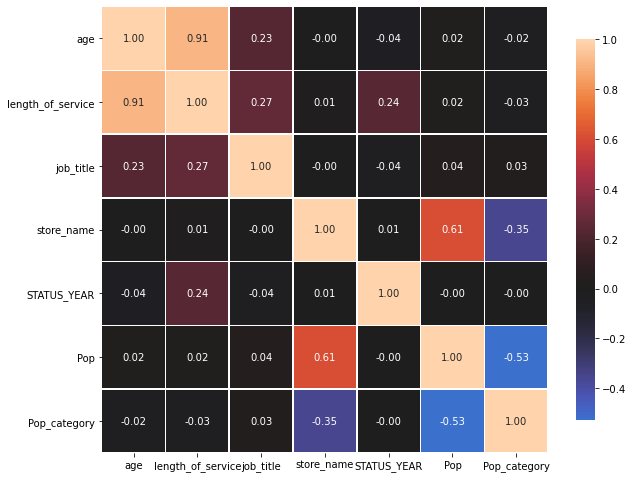

In [18]:
# Checking correlation between independent variables
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()
    
correlation_heatmap(df)

We find strong correlation between age and length_of_service

### Dataset visualizations

Checking frequency distribution for job_title feature

In [40]:
df['job_title'].value_counts()

0    47739
1     1749
3      105
2       60
Name: job_title, dtype: int64

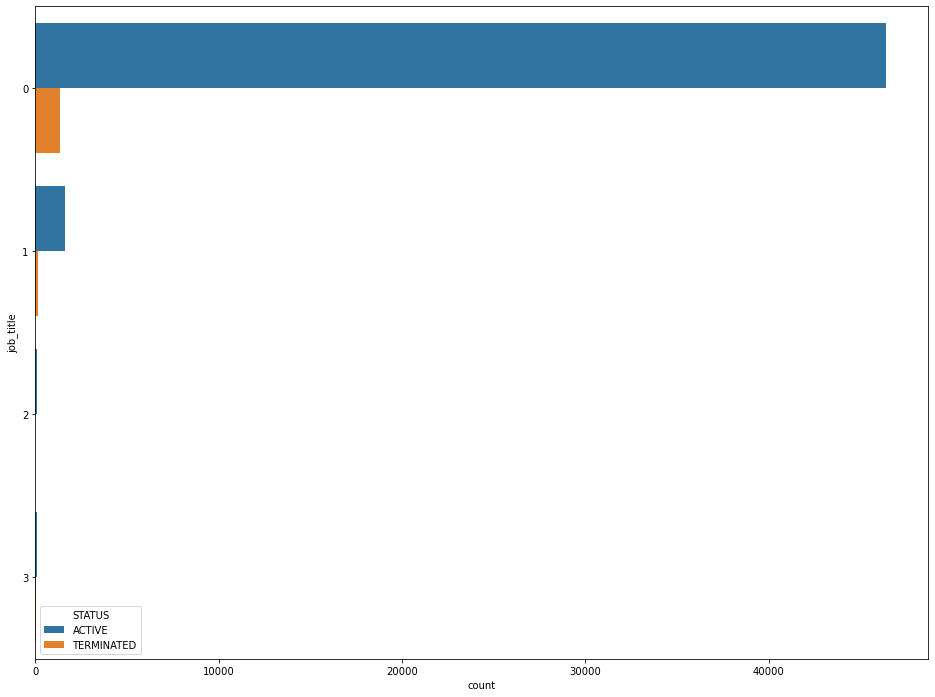

In [44]:
plt.figure(figsize = (16,12))
sns.countplot(y='job_title', data = df, hue='STATUS')
plt.show()

Checking frequency distribution for city_name feature

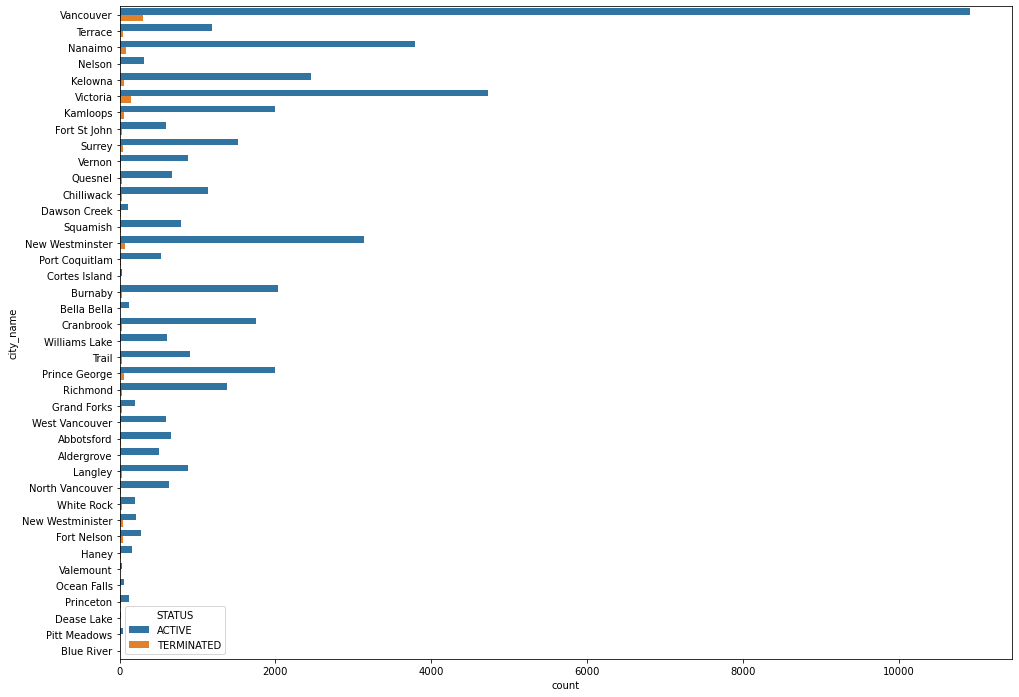

In [45]:
plt.figure(figsize = (16,12))
sns.countplot(y='city_name', data = df, hue='STATUS')
plt.show()

Checking frequency distribution for length_of_service feature

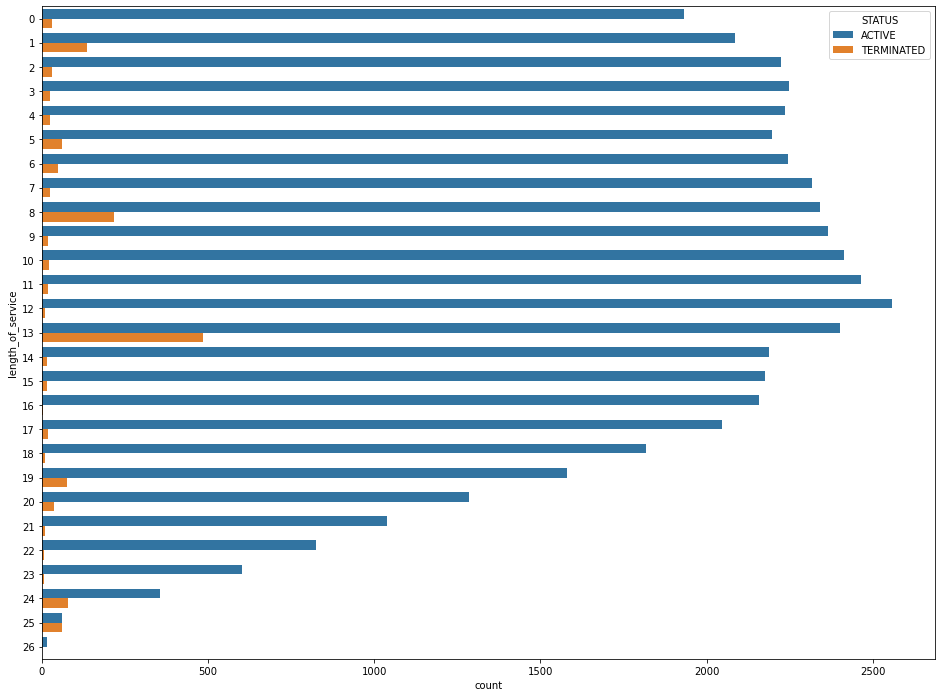

In [46]:
plt.figure(figsize = (16,12))
sns.countplot(y='length_of_service', data = df, hue='STATUS')
plt.show()

#### Next, we'll label encode the remaining categorical features like gender, business_unit etc except the output variable

In [19]:
df_formatted = df.copy()

In [20]:
from sklearn import preprocessing

In [21]:
label_encoder = preprocessing.LabelEncoder()
for col in df_formatted.columns[:-1]:
    if df_formatted[col].dtype == 'object' and col != "STATUS":
        df_formatted[col] = label_encoder.fit_transform(df_formatted[col])
df_formatted

,age,length_of_service,city_name,job_title,store_name,gender_short,STATUS_YEAR,BUSINESS_UNIT,STATUS,Pop,Pop_category
0,52,17,34,2,35,1,2006,0,ACTIVE,2313328,0
1,53,18,34,2,35,1,2007,0,ACTIVE,2313328,0
2,54,19,34,2,35,1,2008,0,ACTIVE,2313328,0
3,55,20,34,2,35,1,2009,0,ACTIVE,2313328,0
4,56,21,34,2,35,1,2010,0,ACTIVE,2313328,0
...,...,...,...,...,...,...,...,...,...,...,...
49648,21,2,33,0,34,1,2015,1,TERMINATED,1020,2
49649,19,0,34,0,44,0,2013,1,TERMINATED,2313328,0
49650,21,2,38,0,39,0,2015,1,TERMINATED,19339,1
49651,19,0,15,0,16,0,2013,1,TERMINATED,179839,0


### Preparing the model

Before moving towards building the model, we can remove the columns which not are relevant to our prediction

In [22]:
df_short = df_formatted.drop(columns = ['store_name','BUSINESS_UNIT', 'city_name'])

In [23]:
df_short['STATUS'] = df_short['STATUS'].map({'ACTIVE': 1, 'TERMINATED': 0})
df_short.head()

,age,length_of_service,job_title,gender_short,STATUS_YEAR,STATUS,Pop,Pop_category
0,52,17,2,1,2006,1,2313328,0
1,53,18,2,1,2007,1,2313328,0
2,54,19,2,1,2008,1,2313328,0
3,55,20,2,1,2009,1,2313328,0
4,56,21,2,1,2010,1,2313328,0


In [24]:
X = df_short.drop('STATUS', axis=1)
y = df_short['STATUS']

In [25]:
X.head()

,age,length_of_service,job_title,gender_short,STATUS_YEAR,Pop,Pop_category
0,52,17,2,1,2006,2313328,0
1,53,18,2,1,2007,2313328,0
2,54,19,2,1,2008,2313328,0
3,55,20,2,1,2009,2313328,0
4,56,21,2,1,2010,2313328,0


In [26]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: STATUS, dtype: int64

### Normalizing the data

In [27]:
X_norm = (X - X.min()) / (X.max() - X.min())
X_norm

,age,length_of_service,job_title,gender_short,STATUS_YEAR,Pop,Pop_category
0,0.717391,0.653846,0.666667,1.0,0.000000,1.000000,0.0
1,0.739130,0.692308,0.666667,1.0,0.111111,1.000000,0.0
2,0.760870,0.730769,0.666667,1.0,0.222222,1.000000,0.0
3,0.782609,0.769231,0.666667,1.0,0.333333,1.000000,0.0
4,0.804348,0.807692,0.666667,1.0,0.444444,1.000000,0.0
...,...,...,...,...,...,...,...
49648,0.043478,0.076923,0.000000,1.0,1.000000,0.000416,1.0
49649,0.000000,0.000000,0.000000,0.0,0.777778,1.000000,0.0
49650,0.043478,0.076923,0.000000,0.0,1.000000,0.008335,0.5
49651,0.000000,0.000000,0.000000,0.0,0.777778,0.077717,0.0


### Splitting the data

In [28]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20)

Since we have a classification type problem, we can use Supervised or Unsupervised learning. As we're trying to find whether the employee is currently employed or has resigned, we'll be using Supervised learning methods like KNN, Decision Tree, Random Forest and select the best model.

###  Using K Nearest Neighbour algorithm

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [30]:
# Building model using 5 nearest neighbours
knn_classifier = KNeighborsClassifier(n_neighbors=5)  
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy*100

98.39895277414158

In [31]:
# Using 7 nearest neighbours
knn_classifier = KNeighborsClassifier(n_neighbors=7)  
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy*100

98.25798006243078

We don't see any improvement so we'll stick with 5 nearest neighbour model

### Using Decision Tree

In [32]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
y_pred = classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy*100

98.66075923874735

We see slight imporovement in accuracy using Decision Tree model

### Using Random Forest

In [34]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [35]:
y_pred = classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy*100

98.95277414157688

Among kNN, Decision Tree and Random Forest, we get the best accuracy for the Random Forest model while choosing 50 estimators.

Since our Random Forest model has the highest accuracy, we'll use this as out final model

### Saving the model

In [36]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
final_model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
final_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [37]:
import joblib
joblib.dump(final_model, 'employee_att.h5')

['employee_att.h5']